<a href="https://colab.research.google.com/github/JK-Pair/Stock_analysis_project/blob/master/Thai_Stock_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas_datareader

In [1]:
import os, sys
import numpy as np
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display, HTML
from datetime import date

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [137]:
stock_list =  ['KBANK', 'AOT'] # "AOT", "ICHI", "CPALL", "CPF", "ASIMAR", "AAV", "AU", 'SCB', 'BBL', 'KTB', 'AOT', 'PTT'
start_date = "2020-03-19" 
end_date = "2020-06-19" 
# end_date = date.today().strftime("%Y-%m-%d")

In [138]:
data = {}
for quote in tqdm(stock_list):
    try:        
        data[quote] = pdr.get_data_yahoo('{}.BK'.format(quote), start=start_date, end=end_date)        
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1]) 
# Cloumns head = High, Low, Open, Close, Volume, Adj Close

100%|██████████| 2/2 [00:01<00:00,  1.61it/s]


In [139]:
print("Show all stocks in the list", list(data.keys()))
[df.head(10) for key, df in data.items()]

Show all stocks in the list ['KBANK', 'AOT']


[             High    Low   Open  Close      Volume  Adj Close
 Date                                                         
 2020-03-19  88.00  86.00  86.75  86.50  15540200.0  82.607498
 2020-03-20  94.75  87.50  90.00  93.00  15805400.0  88.814995
 2020-03-23  84.50  79.25  82.00  79.25  17947300.0  75.683746
 2020-03-24  83.00  79.00  82.50  79.00  17142300.0  75.445000
 2020-03-25  82.75  79.75  81.50  81.50  15671700.0  77.832497
 2020-03-26  85.75  80.50  80.50  84.00  19245800.0  80.220001
 2020-03-27  93.50  86.75  87.00  89.25  28582200.0  85.233749
 2020-03-30  85.00  85.00  85.00  85.00   1562500.0  81.174995
 2020-03-31  92.25  87.50  88.00  91.50  18809300.0  87.382500
 2020-04-01  91.75  88.25  90.75  88.25  14474100.0  84.278748,
              High    Low   Open  Close    Volume  Adj Close
 Date                                                       
 2020-03-19  48.00  45.25  46.75  47.00  53845000      47.00
 2020-03-20  53.75  49.00  49.50  53.75  68263200      53.75

[Text(0.5, 1.0, 'KBANK'), Text(0.5, 1.0, 'AOT')]

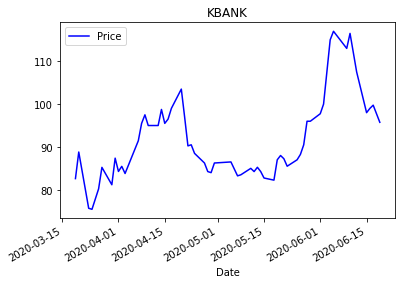

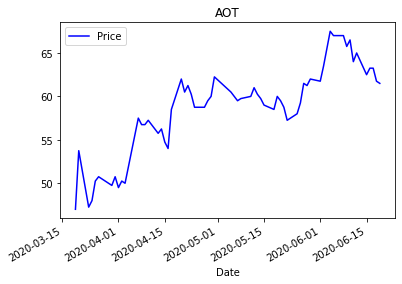

In [140]:
[ df.plot(y='Adj Close', label='Price', style='-b').set_title(key)  for key, df in data.items()]

In [141]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=74859cb6407a6c26c9608b91ac07a78ee0eb554dbe504abdb5f602758587adf6
  Stored in directory: /tmp/pip-ephem-wheel-cache-oypbseld/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [142]:
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
from urllib.request import urlopen
import matplotlib.dates as mdates

In [143]:
# [df.columns.values for key, df in data.items()]
# [df.iloc[:]["Close"].values for key, df in data.items()] #numpy.array()

No handles with labels found to put in legend.


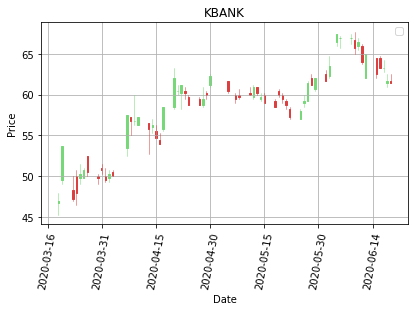

No handles with labels found to put in legend.


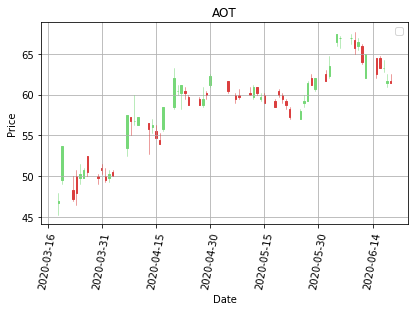

In [146]:
def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    for key, df in data.items():
        timestamp   = df.index.tolist()
        date        = [timestamp[item].toordinal() for item in range(len(timestamp))]
        closep      = df.iloc[:]["Close"].values.tolist()
        highp       = df.iloc[:]["High"].values.tolist()
        lowp        = df.iloc[:]["Low"].values.tolist()
        openp       = df.iloc[:]["Open"].values.tolist()
        volume      = df.iloc[:]["Volume"].values.tolist()
        adj_closep  = df.iloc[:]["Adj Close"].values.tolist()


    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(80)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


for stock in data.keys():
  graph_data(stock)